# Twitter-Bitcoin Correlation Analysis

## 1. Correlation with Sentimental Data & Price of Bitcoin

- Bitcoin 가격과 김도영 학우가 만든 전처리기, 감성분석기를 이용해 상관관계를 확인하기 전 데이터에 대한 분석을 진행하였습니다. 

### 1.1 필요한 라이브러리 import

In [1]:
# nltk 활용을 위한 불용어 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimjuwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
from sentimentalAnalysis import sentimental_analysis
import matplotlib.pyplot as plt
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from coincrawler import coin_crawl_his
from data_pipeline import coin_data_pipeline
from data_concat import data_concat
from Greed_Fear_Model import Greed_Fear_Model
import statsmodels.api as sm 
import numpy as np

### 1.2 필요한 데이터 로드 

- Bitcoin_tweet.csv 파일을 로드하고 해당 어트리뷰트는 무엇인지 데이터 수 등 파악
- 'text'라는 컬럼부분을 'tweet'으로 바꿈 
- 데이터를 파악하여 칼럼 값에 결측치가 있는 것을 확인하였음. 결측치가 있을 경우 학습이 안될 가능성이 높고, compile이 되지 않을 가능성이 높으므로 해당값을 제거해주는 방식으로 코딩을 진행하였음

## ETC 데이터 모델링 ( Target  : 'target_close')

In [3]:
train_data = pd.read_csv('twitter_dataset.csv').drop('Unnamed: 0',axis=1)
train_data

,close,count,flair_avg,flair_sum,follower_number_avg,follower_number_sum,following_number_avg,following_number_sum,high,likes_avg,...,target_market cap,target_open,target_vol,textblob_avg,textblob_sum,tweet_length,vader_avg,vader_sum,vol,date
0,-0.834088,-1.162789,-1.056379,-0.376469,-1.072859,-1.072859,1.227984,-1.060005,-0.927379,-0.137619,...,-0.779133,-0.834254,1.662144,-1.601728,-1.138748,-1.182562,-1.535078,-1.119193,1.033283,2021-02-05
1,-0.711882,-1.068993,-1.235151,-0.545274,-1.015768,-1.015768,-0.314583,-1.018168,-0.649014,-0.338438,...,-0.818141,-0.713469,1.357839,-1.158831,-1.069072,-1.122227,-1.415935,-1.068959,1.734918,2021-02-06
2,-0.751383,-1.083678,-0.535172,-0.391719,-1.045025,-1.045025,-0.100330,-1.021493,-0.779103,-0.147790,...,-0.028745,-0.752944,3.236651,0.142859,-1.037176,-1.127292,-1.392941,-1.075469,1.413791,2021-02-07
3,0.043167,-0.928713,-0.736080,-0.597182,-0.812995,-0.812995,-0.328227,-0.904136,-0.079952,0.256561,...,0.002283,0.039924,2.732172,-1.227601,-0.980785,-1.033034,-1.117558,-0.975328,3.396462,2021-02-08
4,0.074177,-1.005514,-0.710590,-0.507052,-0.917393,-0.917393,-0.082401,-0.952532,0.111223,0.417199,...,-0.166597,0.070861,2.496644,-1.380534,-1.037433,-1.078297,-1.222505,-1.025534,2.864096,2021-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.541904,1.894998,0.335520,-0.157058,1.384053,1.384053,0.067868,1.687080,-0.634168,0.533864,...,-0.441939,-0.542038,-0.741982,0.667252,1.909231,1.813030,0.217156,1.598256,-0.338946,2022-04-18
138,-0.468197,1.993235,0.698866,1.070373,1.490971,1.490971,-0.206844,1.573259,-0.561233,-0.093481,...,-0.455878,-0.468862,-0.610535,1.432367,2.449276,2.012100,0.723046,2.056435,-0.802109,2022-04-19
139,-0.482182,-0.619079,0.618422,-0.029962,-0.579661,-0.579661,-0.447369,-0.668518,-0.513079,0.493986,...,-0.549225,-0.483009,-0.215970,0.869339,-0.540314,-0.624177,-0.013668,-0.636935,-0.663395,2022-04-20
140,-0.574462,0.516362,0.138831,-0.553187,0.701472,0.701472,-0.715335,0.120478,-0.431578,0.770656,...,-0.635999,-0.574881,-0.600496,0.361420,0.456422,0.489720,-0.174005,0.233722,-0.247019,2022-04-21


In [4]:
vader_textblob_etc_train_data = pd.read_csv('vader_textblob_etc_train_data').drop('Unnamed: 0',axis=1)
flair_etc_train_data = pd.read_csv('flair_etc_train_data.csv').drop('Unnamed: 0',axis=1)
etc_train_data = pd.read_csv('etc_train_data').drop('Unnamed: 0',axis=1)
vader_textblob_etc_test_data = pd.read_csv('vader_textblob_etc_test_data').drop('Unnamed: 0',axis=1)
flair_etc_test_data = pd.read_csv('flair_etc_test_data.csv').drop('Unnamed: 0',axis=1)
etc_test_data = pd.read_csv('etc_test_data').drop('Unnamed: 0',axis=1)

In [5]:
gfmodel = Greed_Fear_Model(etc_train_data,etc_test_data)

In [6]:
coin =  gfmodel.coin_data_load('ethereum-classic')

  0%|          | 0/2125 [00:00<?, ?it/s]

In [7]:
gfmodel.convert_train_data(vader_textblob_etc_train_data,flair_etc_train_data)
gfmodel.convert_test_data(vader_textblob_etc_test_data,flair_etc_test_data)

(219, 11)
(219, 12)
date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/219 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/780 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

,date,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,...,close,vol,market cap,target_date,target_open,target_high,target_low,target_close,target_vol,target_market cap
0,2022-04-28,2238,0.6005,0.035324,2.017163,0.118657,-4.063261,-0.239015,26492,1558.352941,...,31.14,447937007.0,4.187932e+09,2022-04-29,31.13,31.36,28.84,29.16,438906497.0,3.919563e+09
1,2022-04-29,6389,6.1388,0.120369,9.016104,0.176786,11.926087,0.233845,40423,792.607843,...,29.16,438906497.0,3.919563e+09,2022-04-30,29.16,29.57,25.44,25.92,466379233.0,3.484531e+09
2,2022-04-30,5779,14.8690,0.330422,5.886640,0.130814,6.697676,0.148837,61016,1355.911111,...,25.92,466379233.0,3.484531e+09,2022-05-01,25.93,27.90,25.90,27.69,478216502.0,3.722963e+09
3,2022-05-01,3759,1.4922,0.049740,5.879167,0.195972,4.451399,0.148380,34192,1139.733333,...,27.69,478216502.0,3.722963e+09,2022-05-02,27.69,28.20,26.69,27.46,426621553.0,3.692555e+09
4,2022-05-02,5979,13.9490,0.317023,10.354076,0.235320,2.427449,0.055169,51889,1179.295455,...,27.46,426621553.0,3.692555e+09,2022-05-03,27.46,27.97,26.57,26.84,357362704.0,3.612270e+09
5,2022-05-03,3167,3.7126,0.148504,4.026587,0.161063,1.302591,0.052104,23959,958.360000,...,26.84,357362704.0,3.612270e+09,2022-05-04,26.84,30.69,26.84,30.69,527659266.0,4.130229e+09
6,2022-05-04,2692,0.5208,0.024800,2.298368,0.109446,6.265916,0.298377,13285,632.619048,...,30.69,527659266.0,4.130229e+09,2022-05-05,30.68,32.36,27.70,28.30,885336779.0,3.809368e+09
7,2022-05-05,3764,2.7996,0.087487,4.273611,0.133550,7.400915,0.231279,16177,505.531250,...,28.30,885336779.0,3.809368e+09,2022-05-06,28.30,28.58,27.27,27.94,522941578.0,3.761901e+09
8,2022-05-06,3448,5.8783,0.235132,4.550000,0.182000,5.435581,0.217423,22085,883.400000,...,27.94,522941578.0,3.761901e+09,2022-05-07,27.94,27.95,26.39,26.89,384217363.0,3.620687e+09
9,2022-05-07,7920,12.8930,0.222293,7.580000,0.130690,3.517014,0.060638,107768,1858.068966,...,26.89,384217363.0,3.620687e+09,2022-05-08,26.89,27.19,26.23,26.45,439272298.0,3.562013e+09


In [8]:
gfmodel.train_normalize()
gfmodel.test_normalize()

,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,likes_sum,...,close,vol,market cap,target_open,target_high,target_low,target_close,target_vol,target_market cap,date
0,-1.032947,-1.076397,-1.007136,-1.028121,-0.221589,-1.345819,-2.633343,-0.673162,0.704367,-0.667295,...,1.460518,-0.590956,1.459556,1.458322,1.284709,1.281978,1.134874,-0.609615,1.127679,2022-04-28
1,0.119605,-0.135300,-0.233682,1.234049,0.711975,0.699590,0.802907,-0.319765,-0.628128,0.474499,...,0.935854,-0.639576,0.929202,0.936592,0.787271,0.390087,0.229735,-0.464034,0.221189,2022-04-29
2,-0.049766,1.348181,1.676679,0.222556,-0.026338,0.030754,0.185161,0.202631,0.352093,-0.034790,...,0.077312,-0.491663,0.069485,0.081165,0.323180,0.510754,0.724209,-0.401307,0.718018,2022-04-30
3,-0.610632,-0.924875,-0.876023,0.220141,1.020100,-0.256597,0.181838,-0.477831,-0.024085,-0.930154,...,0.546330,-0.427931,0.540678,0.547280,0.406549,0.717988,0.659955,-0.674714,0.654655,2022-05-01
4,0.005765,1.191850,1.554816,1.666503,1.652023,-0.515507,-0.495519,-0.028900,0.044759,0.301998,...,0.485384,-0.705718,0.480585,0.486367,0.342633,0.686509,0.486750,-1.041725,0.487362,2022-05-02
5,-0.775004,-0.547573,0.022199,-0.378643,0.459465,-0.659402,-0.517797,-0.737418,-0.339698,-0.987655,...,0.321096,-1.078609,0.321924,0.322168,1.098517,0.757336,1.562300,-0.139303,1.566650,2022-05-03
6,-0.906891,-1.089940,-1.102843,-0.937231,-0.369510,-0.024478,1.271858,-1.008193,-0.906529,1.887367,...,1.341276,-0.161730,1.345523,1.339145,1.562608,0.982932,0.894621,1.756073,0.898062,2022-05-04
7,-0.609243,-0.702715,-0.532723,-0.298801,0.017604,0.120715,0.784258,-0.934830,-1.127678,-1.143727,...,0.707969,1.764008,0.711433,0.708831,0.512151,0.870134,0.794050,-0.164303,0.799153,2022-05-05
8,-0.696983,-0.179566,0.810049,-0.209467,0.795706,-0.130697,0.683572,-0.784957,-0.470138,-0.470151,...,0.612576,-0.187130,0.617627,0.613489,0.337075,0.639292,0.500718,-0.899419,0.504901,2022-05-06
9,0.544696,1.012409,0.693284,0.769877,-0.028338,-0.376126,-0.455777,1.388620,1.225912,1.862724,...,0.334345,-0.934023,0.338558,0.335409,0.125872,0.597320,0.377798,-0.607677,0.382640,2022-05-07


In [9]:
from data_concat import data_concat

d_concat = data_concat()
gfmodel.normed_train_data = d_concat.concat([gfmodel.normed_train_data, train_data])

  0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
gfmodel.make_model()

In [11]:
result = gfmodel.predict()
result

/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:417: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result['correct'] = pd.Series()
/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['correct'].iloc[i] =True


,target_close,predict_close,date,vol,close,target_date,Greed_Fear_Score,difference,correct
0,29.829033,29.16,2022-04-28,447937007.0,31.14,2022-04-29,-63.583815,-1.310967,True
1,28.540306,25.92,2022-04-29,438906497.0,29.16,2022-04-30,-111.111111,-0.619694,True
2,24.803042,27.69,2022-04-30,466379233.0,25.92,2022-05-01,68.287037,-1.116958,False
3,27.268861,27.46,2022-05-01,478216502.0,27.69,2022-05-02,-8.306248,-0.421139,True
4,26.097406,26.84,2022-05-02,426621553.0,27.46,2022-05-03,-22.578296,-1.362594,True
5,26.034664,30.69,2022-05-03,357362704.0,26.84,2022-05-04,143.442623,-0.805336,False
6,30.334341,28.30,2022-05-04,527659266.0,30.69,2022-05-05,-77.875529,-0.355659,True
7,27.849080,27.94,2022-05-05,885336779.0,28.30,2022-05-06,-12.720848,-0.450920,True
8,27.050952,26.89,2022-05-06,522941578.0,27.94,2022-05-07,-37.580530,-0.889048,True
9,25.871468,26.45,2022-05-07,384217363.0,26.89,2022-05-08,-16.362960,-1.018532,True


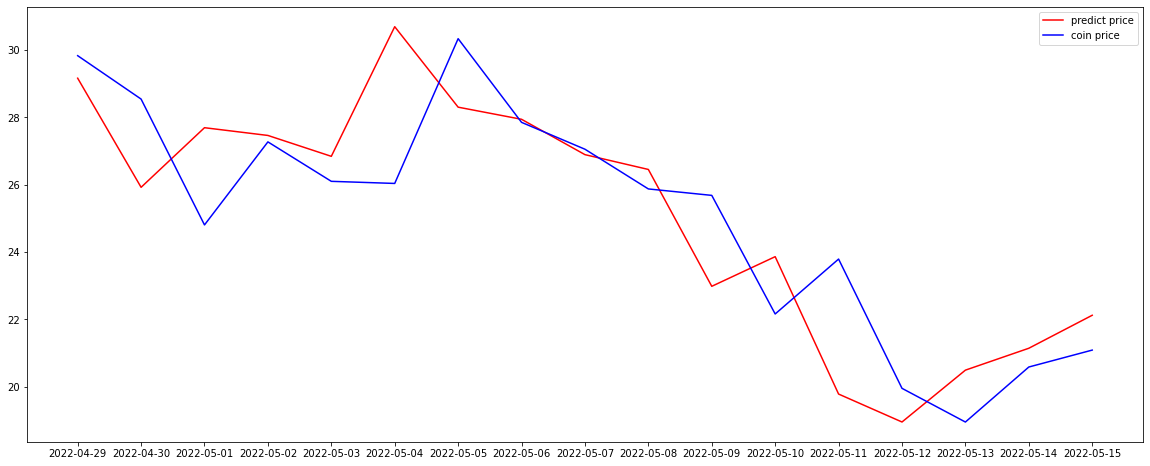

In [12]:
gfmodel.visualize()

In [13]:
result.to_csv('ETC_result_data')
gfmodel.save_csv('ETC_Visulize_data.csv')